File created by rydhslmy at 2022/11/30 09:00 AM.\
Description : Reinforcement Learning Algorithm for finding shortest path in a Maze.\
Purpose : Act as comparison for the Deep Q-Network models that is to be created.\

# Preparation Stage

In [1]:
## Import libraries
import os
import random
import math
from IPython.display import SVG
import numpy as np
import itertools

## Import custom
from lib import qLearning as ql
from lib import support as fn
from lib import mazeSVG

In [2]:
## Define main directories
configDir = 'maze_config'
resultDir = 'results'
tempDir = 'temp'
cDir = '.'
# c_dir = os.getcwd()

## Generate paths
## Path to maze config files
configPath = fn.gen_path(cDir, configDir)

## Path to maze results folder
resultPath = fn.gen_path(cDir, resultDir)

## Path to experimental results folder
tempPath = fn.gen_path(cDir, tempDir)

File 'maze_config' exist in '.'
File 'results' exist in '.'
File 'temp' exist in '.'


Scanning Maze Config File...
	8 maze config file(s) found.
	1 maze config set(s) found.
Scanning finished.
List of available maze configs:
	1) 22083010X10c4.txt
	2) 22100605X05c0.txt
	3) 22100605X05c1.txt
	4) 22100605X05c2.txt
	5) 22100605X05c3.txt
	6) 22100605X05c4.txt
	7) 22113040X40c0.txt
	8) 22113040X40c1.txt
	9) 230116_set0
Please choose maze configuration file!
	Input Select Index (1-9) : 2
	Selected '22100605X05c0.txt'
Reading Config File...
	Config file contain 1 maze.
	Loading maze config...
		Loading "./maze_config/22100605X05c0.txt"...
			File consists of 53 lines of data.
			Maze size loaded. 5X5 (25 states)
			Number of action loaded. There are 4 actions
			Next State list loaded.
			Current Reward list loaded.
		Finish loading "./maze_config/22100605X05c0.txt"


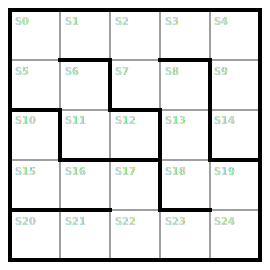

In [3]:
## Select maze config file
selectedConfig = fn.select_maze(configPath)

## Read maze config file
configData = fn.load_mazeConfig(configPath, selectedConfig)

## Display maze for all loaded config data
for data in configData:
    blankMaze = 'temp/temp.svg'
    mSVG = mazeSVG.drawMaze(data['mX'], data['mY'], data['NS'])
    mSVG.gen_svg(blankMaze)
    display(SVG(blankMaze))

In [4]:
## Set Goal State Reward
goalReward = 10

## Choose a random goal state for all maze loaded and update the RT matrix
for data in configData:
    idx = 1 + configData.index(data)
    print(f'Choosing Goal State randomly for the maze in config data {idx}...')
    
    ## Select goal state randomly from possible candidates
    possibleGoals = fn.find_goals(data['NS'])
    goalState = random.choice(possibleGoals)

    ## Create list of possible start
    startStateList = possibleGoals[:]
    startStateList.remove(goalState)

    print(f'\tList of possible Goal State :{possibleGoals}')
    print(f'\tChosen Goal State : {goalState}')
    print(f'\tList of Start State : {startStateList}')
    
    data['gS'] = goalState
    data['sSL'] = startStateList
    
    ## Update Reward Matrix
    for i in range(data['N']):
        for j in range(data['Z']):
            if (data['NS'][i][j]==goalState)&(i != goalState):
                data['RT'][i][j] = goalReward
    print('\tCurrent Reward list updated.')
    
#     for key, value in data.items() :
#         print (key)

Choosing Goal State randomly for the maze in config data 1...
	List of possible Goal State :[10, 12, 14, 20]
	Chosen Goal State : 10
	List of Start State : [12, 14, 20]
	Current Reward list updated.


In [5]:
## Set Hyparameters
list_of_E = [10000] # List of total episodes
list_of_T = [10*configData[0]['N']] # List of total steps
list_of_alpha = [0.125, 0.25] # Learning Rate
list_of_gamma = [0.875] # Discount Factor
list_of_epsilon = [0.99]

## Generate hyperparameter sets
a = [list_of_E, list_of_T, list_of_alpha, list_of_gamma, list_of_epsilon]
hyp_set = list(itertools.product(*a))

## Count the number of simulation that must be run
total_run = len(hyp_set)

## [OPTIONAL] Print hyperparameter sets
for i in range(total_run):
    E, T, alph, gamm, epsi = hyp_set[i]
    print(f'[Set {i+1}/{total_run}]')
    print(f' Total Episode   = {E}')
    print(f' Maximum Step    = {T}')
    print(f' Learning Rate   = {alph}')
    print(f' Discount Factor = {gamm}')
    print(f' Epsilon         = {epsi}')
    print(f'')

[Set 1/2]
 Total Episode   = 10000
 Maximum Step    = 250
 Learning Rate   = 0.125
 Discount Factor = 0.875
 Epsilon         = 0.99

[Set 2/2]
 Total Episode   = 10000
 Maximum Step    = 250
 Learning Rate   = 0.25
 Discount Factor = 0.875
 Epsilon         = 0.99



 ### Perform Software Simulations

Inisialisasi simulasi *Q-learning* sesuai dengan jumlah *simulation sets* yang telah dihasilkan

In [6]:
## Intitialize empty list for the simulations
sw_list = []

## Initialize simulation for each hyperparameter sets
for i in range(total_run):
    ### Read hyperparameters from the set
    E, T, alph, gamm, epsi = hyp_set[i]
    
    ### TEMP
    data = configData[0]
    
    ### Initialize Software Model and store in the simulation list
    sw = ql.qrl(maze_x = data['mX'],
                maze_y = data['mY'],
                total_state = data['N'],
                total_action = data['Z'],
                learning_rate = alph, 
                discount_factor = gamm,
                initial_exploration_rate = epsi,
                max_episode = E,
                max_step = T,
                goal_state = data['gS'],
                reward_matrix = data['RT'],
                ns_matrix = data['NS'],
                random_pool = data['sSL']
               )
    sw_list.append(sw)
    
    ### [OPTIONAL] Print status
    print(f'[INITIALIZE SIMULATION {i+1}/{total_run}]')
    print(f' [Simulation hyperparameters]')
    print(f'  Total Episode (E)   = {E}')
    print(f'  Maximum Step (T)   = {T}')
    print(f'  Learning Rate (\u03B1)  = {alph}')
    print(f'  Discount Factor (\u03B3) = {gamm}')
    print(f'  Epsilon (\u03B5)        = {epsi}')
    print(f'')

[INITIALIZE SIMULATION 1/2]
 [Simulation hyperparameters]
  Total Episode (E)   = 10000
  Maximum Step (T)   = 250
  Learning Rate (α)  = 0.125
  Discount Factor (γ) = 0.875
  Epsilon (ε)        = 0.99

[INITIALIZE SIMULATION 2/2]
 [Simulation hyperparameters]
  Total Episode (E)   = 10000
  Maximum Step (T)   = 250
  Learning Rate (α)  = 0.25
  Discount Factor (γ) = 0.875
  Epsilon (ε)        = 0.99



In [7]:
## Intialize empty list to store the simulation runtime 
runtime_list = []

## Run all the simulation in the simulation list
for i in range(total_run):
    ### Run simulation and get runtime
    print(f'[Simulation {i+1}/{len(sw_list)}]')
    runtime = sw_list[i].start()
    
    ### Store runtime in the runtime list
    runtime_list.append(runtime)

[Simulation 1/2]
 Progress = 100%
 Finished learning for 10000 episodes
 Runtime = 2.0210742950439453 s
[Simulation 2/2]
 Progress = 100%
 Finished learning for 10000 episodes
 Runtime = 2.0208888053894043 s


===============[CONVERGENCE TEST 1/2]===============
 Goal reached count: 3/3
 Shortest path for Test 1:


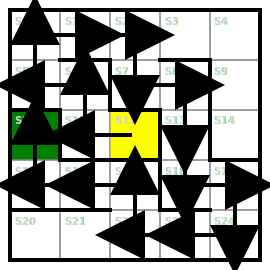

 Shortest path for Test 2:


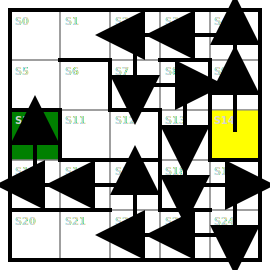

 Shortest path for Test 3:


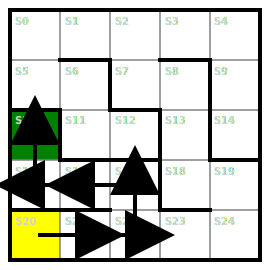

===============[CONVERGENCE TEST 2/2]===============
 Goal reached count: 3/3
 Shortest path for Test 1:


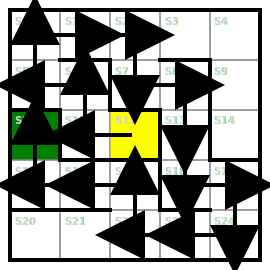

 Shortest path for Test 2:


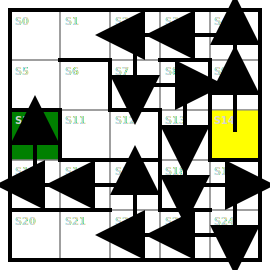

 Shortest path for Test 3:


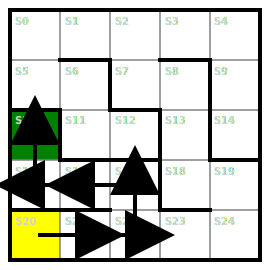

In [8]:
## Intialize empty list to store the convergence test results 
conv_test_results_list = []

## Perform Convergence Test for each simulation
for i in range(total_run):
    ### Run the convergence test and read the results
    print(f'{"="*15}[CONVERGENCE TEST {i+1}/{total_run}]{"="*15}')
    pass_count, records, fail_list = sw_list[i].shortest_path_test(quiet=True)
            
    ### Add results to the convergence test list
    conv_test_results = [pass_count, records, fail_list]
    conv_test_results_list.append(conv_test_results)
        
    ### [OPTIONAL] Display the results of the convergence test
    idx = 0
    for path in records:
        idx += 1
        print(f' Shortest path for Test {idx}:')
        temp = 'temp/temp.svg'
        mSVG.gen_svg(temp,path=path)
        display(SVG(temp))

 ### Save run results

Menyimpan semua hasil *simulation run* yang telah dilakukan.

In [10]:
## Generate Save Directory
save_dir = fn.gen_save_dir(resultPath, total_run, status = True)

UPDATING ./results/set_runs
CREATING ./results/set_runs/230116_set0
CREATING ./results/set_runs/230116_set0/run_0
CREATING ./results/set_runs/230116_set0/run_0/raw_data
CREATING ./results/set_runs/230116_set0/run_0/shortest_path_test
CREATING ./results/set_runs/230116_set0/run_0/qMatrix_change
CREATING ./results/set_runs/230116_set0/run_1
CREATING ./results/set_runs/230116_set0/run_1/raw_data
CREATING ./results/set_runs/230116_set0/run_1/shortest_path_test
CREATING ./results/set_runs/230116_set0/run_1/qMatrix_change


In [12]:
## Generate and save State Visit Count for each simulation run
for i in range(total_run):
    ### Get state visit count map
    svc = sw_list[i].state_visit_count.reshape((data['mX'], data['mY']))
    
    ### Generate save path
    if total_run == 1:
        save_path = save_dir
    else:
        save_path = os.path.join(save_dir, f'run_{i}')

    ### Save state visit count map to the save path    
    fn.vis_svc(svc, gen_file=save_path, show=False)

Saved 'svc.png' to './results/set_runs/230116_set0/run_0'
Saved 'svc.png' to './results/set_runs/230116_set0/run_1'


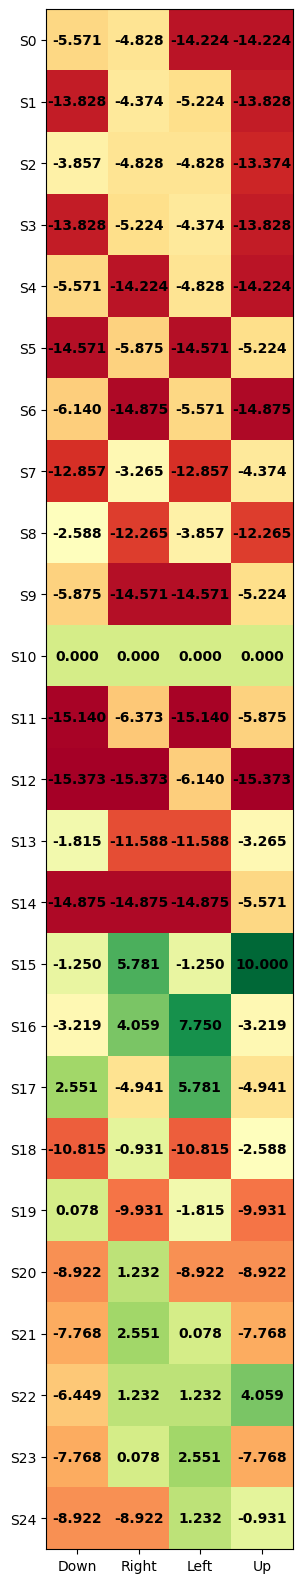

Saved 'q_table.png' to './results/set_runs/230116_set0/run_0'


<Figure size 640x480 with 0 Axes>

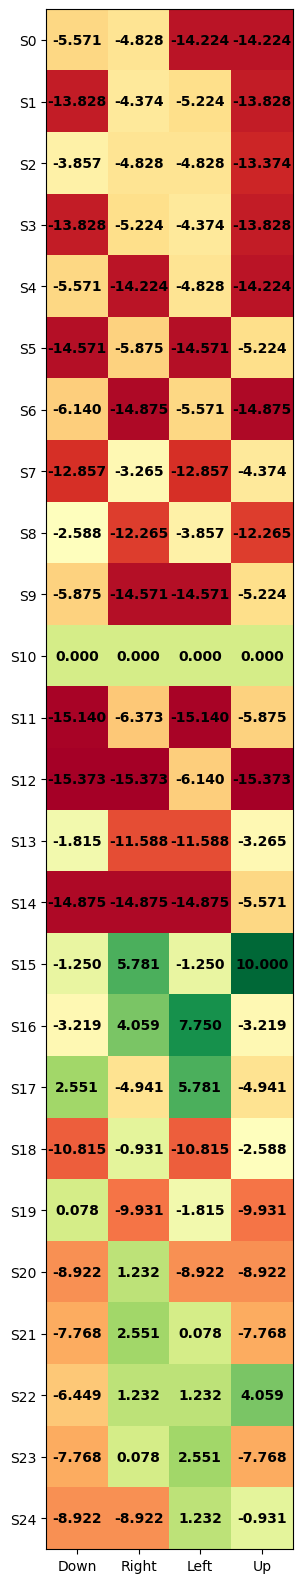

Saved 'q_table.png' to './results/set_runs/230116_set0/run_1'


<Figure size 640x480 with 0 Axes>

In [13]:
## Generate and save Q-Table Heatmap for each simulation run
for i in range(total_run):
    ### Generate save path
    if total_run == 1:
        save_path = save_dir
    else:
        save_path = os.path.join(save_dir, f'run_{i}')
    
    ### Generate Q-Table Heatmap and save to the save path
    fn.display_qTable(sw_list[i].Q, gen_file=save_path)

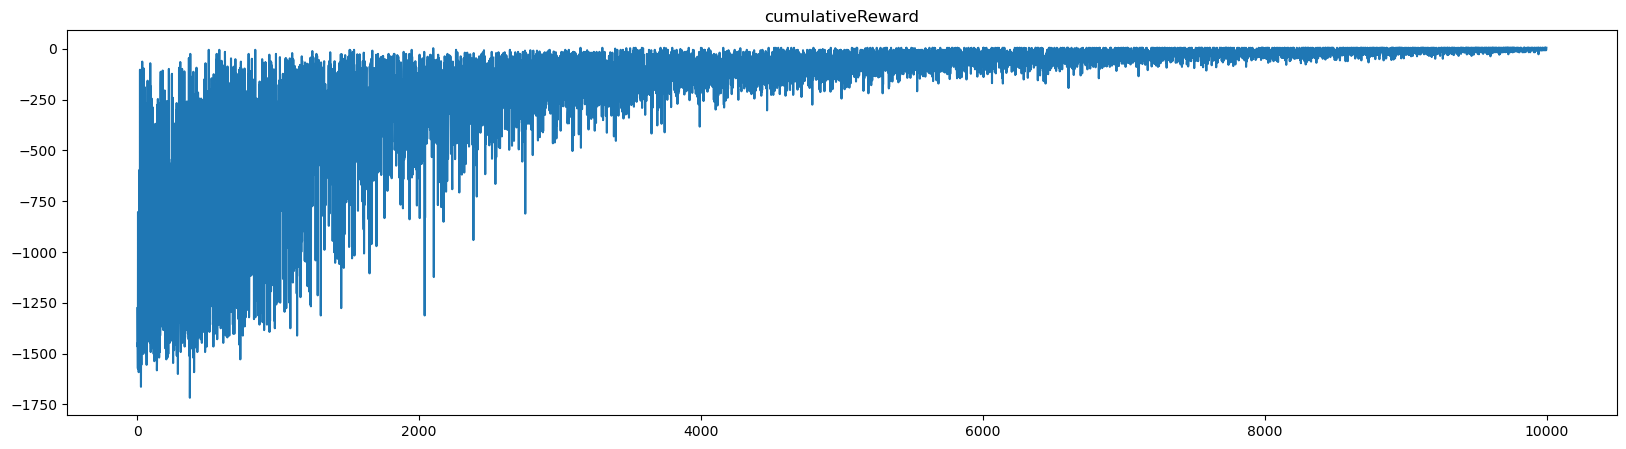

Saved 'cumulativeReward.png' to './results/set_runs/230116_set0/run_0'


<Figure size 640x480 with 0 Axes>

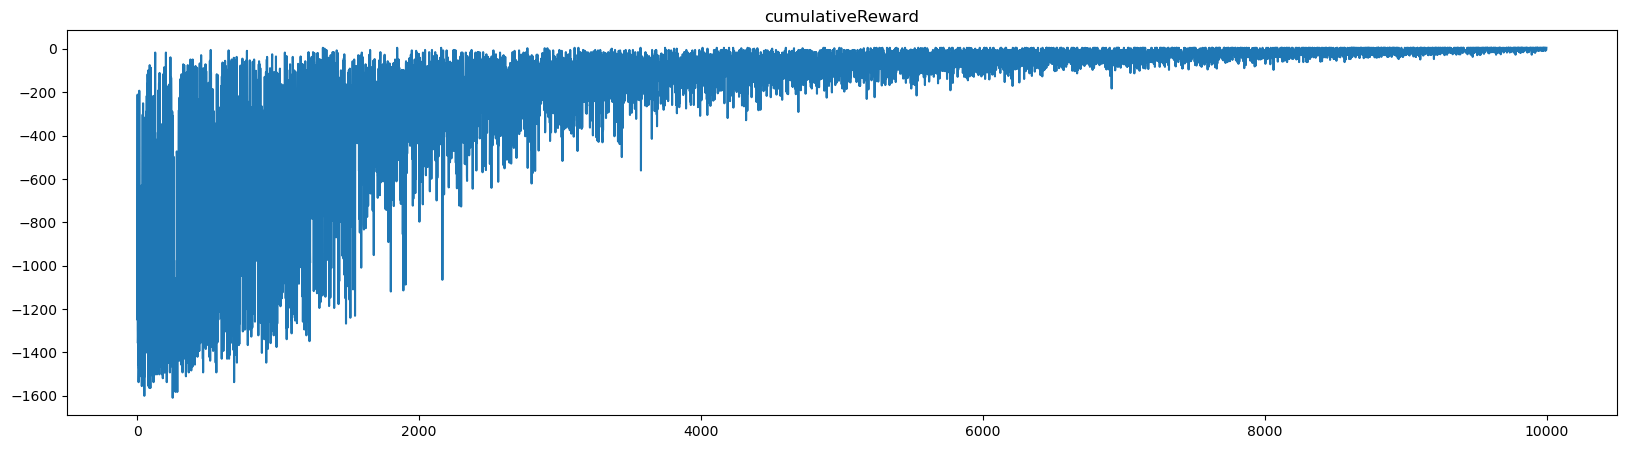

Saved 'cumulativeReward.png' to './results/set_runs/230116_set0/run_1'


<Figure size 640x480 with 0 Axes>

In [14]:
## Generate and save Cumulative Rewards for each simulation run
for i in range(total_run):
    ### Generate save path
    if total_run == 1:
        save_path = save_dir
    else:
        save_path = os.path.join(save_dir, f'run_{i}')
    
    ### Generate Cumulative Reward Plot and save to the save path
    fn.plot(sw_list[i].cumulative_rewards, gen_file=save_path, title='cumulativeReward')

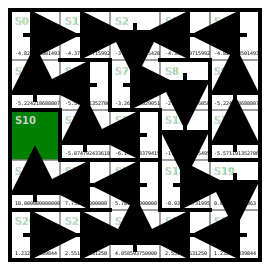

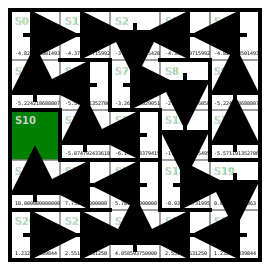

In [16]:
## Generate and save Convergence Map for each simulation run
for i in range(total_run):
    ### Generate Max Matrix
    max_matrix = fn.gen_maxMatrix(sw_list[i].Q)
    
    ### Generate Save Path
    if total_run == 1:
        save_path = save_dir
    else:
        save_path = os.path.join(save_dir, f'run_{i}')

    ### Generate Convergence Map and save to Save Path
    mcm_file = 'convergence_map.svg'
    mcm_dir = os.path.join(save_path, mcm_file)
    mSVG.gen_convergenceMap(mcm_dir, max_matrix, data['gS'])
    display(SVG(mcm_dir))

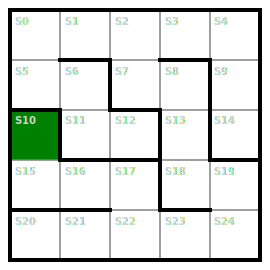

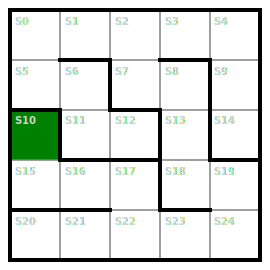

In [18]:
## Generate and save Maze Case for each simulation run
for i in range(total_run):
    ### Generate Save Path
    if total_run == 1:
        save_path = save_dir
    else:
        save_path = os.path.join(save_dir, f'run_{i}')

    ### Generate Maze Case and save to Save Path
    maze_case_file = 'maze_case.svg'
    maze_case_dir = os.path.join(save_path, maze_case_file)
    mSVG.gen_svg(maze_case_dir, goal_st=data['gS'])
    display(SVG(maze_case_dir))

In [22]:
## Generate and save Summary Data for each simulation run
for i in range(total_run):
    ### Initialize Summary Data
    main_list = []

    ### Add Hyperparameter data
    sub_list = []
    title = f'Hyperparameter'
    sub_list.append(title)
    ### Read hyperparameters from Hyperparameter List
    E, T, alph, gamm, epsi = hyp_set[i]
    ###
    hyparam = []
    hyparam.append(['Maze configuration file', selectedConfig])
    hyparam.append(['Total episode', E])
    hyparam.append(['Maximum step', T])
    hyparam.append(['Learning rate', alph])
    hyparam.append(['Discount factor', gamm])
    hyparam.append(['Epsilon', epsi])
    hyparam.append(['Goal state', data['gS']])
    sub_list.append(hyparam)
    ###
    main_list.append(sub_list)

    ### Add Results data
    sub_list = []
    title = f'Results'
    sub_list.append(title)
    ### Read hyperparameters from Hyperparameter List
    E, T, alph, gamm, epsi = hyp_set[i]
    ###
    pass_count, records, fail_list = conv_test_results_list[i]
    ###
    hyparam = []
    hyparam.append(['Possible start state', startStateList])
    hyparam.append(['Learning time (s)', runtime_list[i]])
    hyparam.append(['Shortest path test', f'{pass_count}/{len(records)}'])
    if len(fail_list): hyparam.append(['Failed Case', f'{fail_list}'])
    sub_list.append(hyparam)
    ###
    main_list.append(sub_list)
    
    ### Generate Save Path
    if total_run == 1:
        save_path = save_dir
    else:
        save_path = os.path.join(save_dir, f'run_{i}')

    ### Write Summary Data and save to Save Path 
    summary_file = 'summary.txt'
    fn.write_result_summary(summary_file, main_list, target_dir=save_path, quiet=False)

File 'summary.txt' generated and saved to './results/set_runs/230116_set0/run_0'
File 'summary.txt' generated and saved to './results/set_runs/230116_set0/run_1'


In [23]:
## Save Convergence Test Result for each simulation run
subfolder = 'shortest_path_test'
for i in range(total_run):
    ### Generate Save Path
    if total_run == 1:
        save_path = save_dir
    else:
        save_path = os.path.join(save_dir, f'run_{i}')
        
    ### Read Records from Convergence Test Result
    records = conv_test_results_list[i][1]
    
    ### Save all of the Records
    for path in records:
        st = path[0][0]
        st1 = path[-1][-1]
        filename = f'S{st}_S{st1}.svg'
        sub_dir = os.path.join(save_path, subfolder)
        file_dir = os.path.join(sub_dir, filename)
        mSVG.gen_svg(file_dir,path=path)

In [25]:
## Save Raw Data for each simulation run
subfolder = 'raw_data'
for i in range(total_run):
    ### Generate Save Path
    if total_run == 1:
        save_path = save_dir
    else:
        save_path = os.path.join(save_dir, f'run_{i}') 
    sub_dir = os.path.join(save_path, subfolder)

    ### Write Q-Matrix File to Save Path
    filename = 'qMatrix.txt'
    target_path = os.path.join(sub_dir, filename)
    np.savetxt(target_path, sw_list[i].Q, delimiter=",")

    ### Write Exploration Count File to Save Path
    filename = 'expPerEpisode.txt'
    target_path = os.path.join(sub_dir, filename)
    np.savetxt(target_path, sw_list[i].exploration_per_episode, delimiter=",")

    ### Write Total Step Count File to Save Path
    filename = 'stepPerEpisode.txt'
    target_path = os.path.join(sub_dir, filename)
    np.savetxt(target_path, sw_list[i].step_per_episode, delimiter=",")

    ### Write State Visits File to Save Path
    filename = 'stateVisits.txt'
    target_path = os.path.join(sub_dir, filename)
    ### Get state visit count map
    svc = sw_list[i].state_visit_count.reshape((data['mX'], data['mY']))
    np.savetxt(target_path, svc, delimiter=",")

    ### Write Cumulative Reward File to Save Path
    filename = 'cumulativeReward.txt'
    target_path = os.path.join(sub_dir, filename)
    np.savetxt(target_path, sw_list[i].cumulative_rewards, delimiter=",")

In [ ]:
# fn.plot(sw.exploration_per_episode, title='Exploration per episode')
# fn.plot(sw.step_per_episode, title='Total Step per episode')

## 